In [5]:
#Karan Veer Singh
#Internship Task 2
#Cognifyz Tech 

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('Dataset .csv'); print('shape:',df.shape); df.head()

shape: (9551, 21)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
num_cols=df.select_dtypes(include=[np.number]).columns.tolist()
desc=df[num_cols].describe().T
print('numeric summary:\n',desc.round(2))
for c in num_cols:
    m=df[c].mean(); md=df[c].median(); s=df[c].std()
    print(f'{c}: mean={m:.2f} | median={md:.2f} | std={s:.2f}')

numeric summary:
                        count        mean         std     min        25%  \
Restaurant ID         9551.0  9051128.35  8791521.28   53.00  301962.50   
Country Code          9551.0       18.37       56.75    1.00       1.00   
Longitude             9551.0       64.13       41.47 -157.95      77.08   
Latitude              9551.0       25.85       11.01  -41.33      28.48   
Average Cost for two  9551.0     1199.21    16121.18    0.00     250.00   
Price range           9551.0        1.80        0.91    1.00       1.00   
Aggregate rating      9551.0        2.67        1.52    0.00       2.50   
Votes                 9551.0      156.91      430.17    0.00       5.00   

                             50%          75%          max  
Restaurant ID         6004089.00  18352291.50  18500652.00  
Country Code                1.00         1.00       216.00  
Longitude                  77.19        77.28       174.83  
Latitude                   28.57        28.64        55.98  
A

In [7]:
cc = df['Country Code'].value_counts()
ct = df['City'].value_counts()
print('country codes top:\n', cc.head(10))
print('\ncities top:\n', ct.head(10))

cuis = df['Cuisines'].fillna('').astype(str).str.split(',', expand=True).stack().str.strip()
cuis = cuis[cuis!=''].reset_index(level=1, drop=True).rename('Cuisine')
c_count = cuis.value_counts()
print('\ncommon cuisines:\n', c_count.head(15))

country codes top:
 Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
Name: count, dtype: int64

cities top:
 City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64

common cuisines:
 Cuisine
North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
Street Food      562
American         390
Pizza            381
Mithai           380
Burger           251
Name: count, dtype: int64


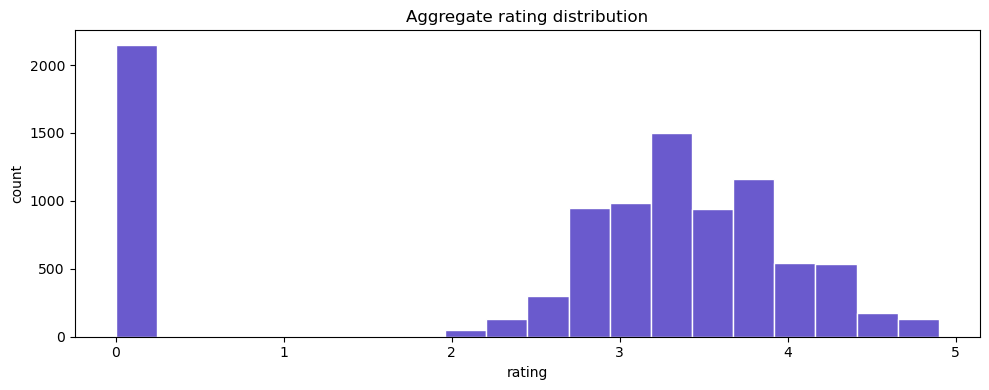

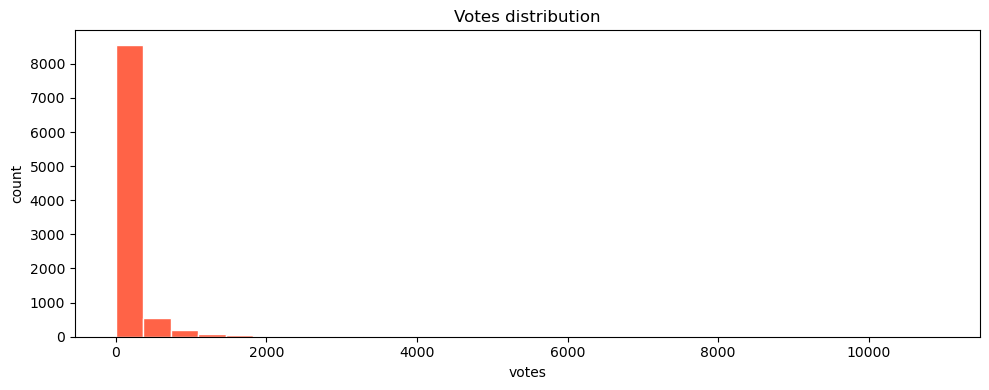

In [8]:
plt.figure(figsize=(10,4)); plt.hist(df['Aggregate rating'],bins=20,color='slateblue',edgecolor='white'); plt.title('Aggregate rating distribution'); plt.xlabel('rating'); plt.ylabel('count'); plt.tight_layout(); plt.show()
plt.figure(figsize=(10,4)); plt.hist(df['Votes'],bins=30,color='tomato',edgecolor='white'); plt.title('Votes distribution'); plt.xlabel('votes'); plt.ylabel('count'); plt.tight_layout(); plt.show()

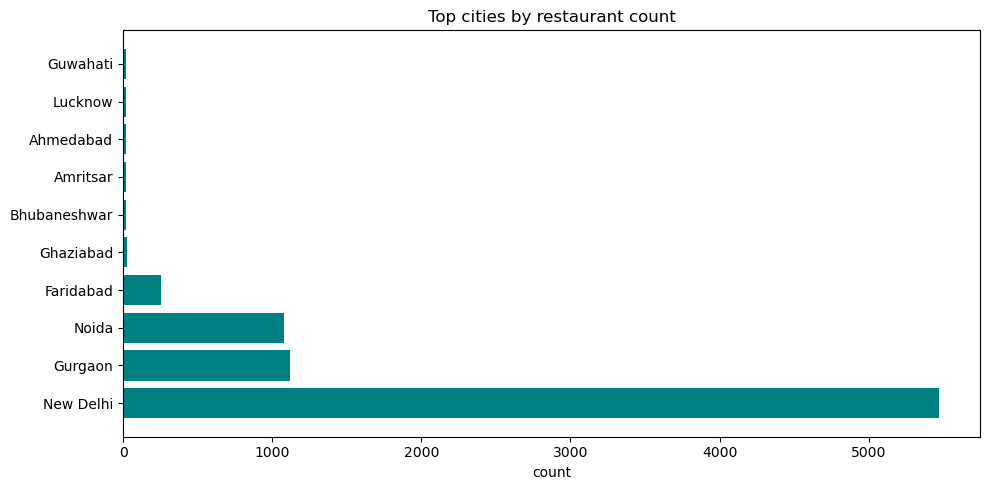

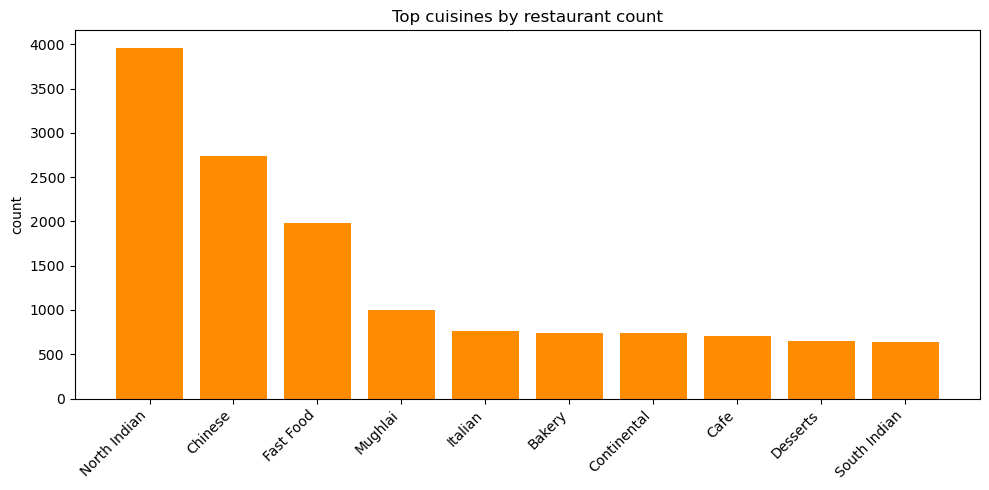

In [9]:
top_cities=ct.head(10); plt.figure(figsize=(10,5))
plt.barh(range(len(top_cities.index)),top_cities.values,color='teal'); plt.yticks(range(len(top_cities.index)),top_cities.index)
plt.title('Top cities by restaurant count'); plt.xlabel('count'); plt.tight_layout(); plt.show()

top_cuis=c_count.head(10); plt.figure(figsize=(10,5))
pos=np.arange(len(top_cuis.index)); plt.bar(pos,top_cuis.values,color='darkorange'); plt.xticks(pos,top_cuis.index,rotation=45,ha='right')
plt.title('Top cuisines by restaurant count'); plt.ylabel('count'); plt.tight_layout(); plt.show()

In [11]:
tb_counts=df['Has Table booking'].value_counts(); od_counts=df['Has Online delivery'].value_counts()
tb_pct=(tb_counts/tb_counts.sum()*100).round(2); od_pct=(od_counts/od_counts.sum()*100).round(2)

print('table booking counts:\n', tb_counts, '\n%:\n', tb_pct)
print('\nonline delivery counts:\n', od_counts, '\n%:\n', od_pct)

tb_stats=df.groupby('Has Table booking')['Aggregate rating'].agg(['mean','median','count']).round(3)
od_stats=df.groupby('Has Online delivery')['Aggregate rating'].agg(['mean','median','count']).round(3)

print('\nrating by table booking:\n', tb_stats)
print('\nrating by online delivery:\n', od_stats)

table booking counts:
 Has Table booking
No     8393
Yes    1158
Name: count, dtype: int64 
%:
 Has Table booking
No     87.88
Yes    12.12
Name: count, dtype: float64

online delivery counts:
 Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64 
%:
 Has Online delivery
No     74.34
Yes    25.66
Name: count, dtype: float64

rating by table booking:
                     mean  median  count
Has Table booking                      
No                 2.559     3.1   8393
Yes                3.442     3.6   1158

rating by online delivery:
                       mean  median  count
Has Online delivery                      
No                   2.465     3.1   7100
Yes                  3.249     3.4   2451


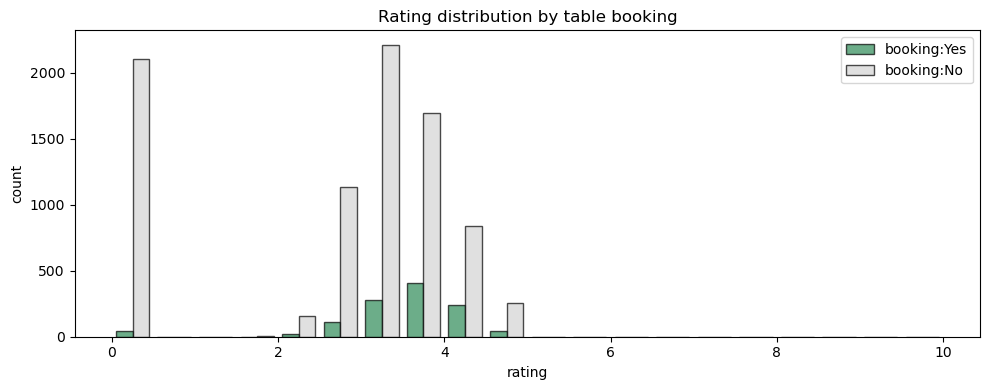

In [12]:
tb_yes=df[df['Has Table booking']=='Yes']['Aggregate rating']; tb_no=df[df['Has Table booking']=='No']['Aggregate rating']
plt.figure(figsize=(10,4))
bins=np.linspace(0,10,21)
plt.hist([tb_yes,tb_no],bins=bins,label=['booking:Yes','booking:No'],color=['seagreen','lightgray'],alpha=.7,edgecolor='black')
plt.title('Rating distribution by table booking'); plt.xlabel('rating'); plt.ylabel('count'); plt.legend(); plt.tight_layout(); plt.show()

online delivery by price range (%):
 Has Online delivery     No    Yes
Price range                      
1                    84.23  15.77
2                    58.69  41.31
3                    70.81  29.19
4                    90.96   9.04

counts:
 Has Online delivery    No   Yes
Price range                    
1                    3743   701
2                    1827  1286
3                     997   411
4                     533    53


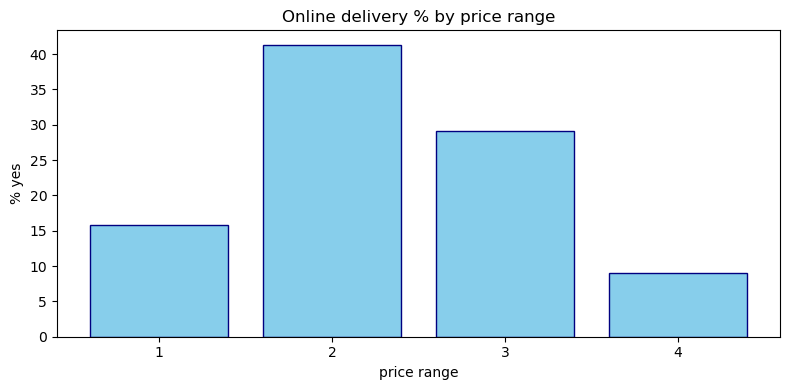

In [13]:
od_price = pd.crosstab(df['Price range'], df['Has Online delivery'], normalize='index')*100
od_price_counts = pd.crosstab(df['Price range'], df['Has Online delivery'])

print('online delivery by price range (%):\n', od_price.round(2))
print('\ncounts:\n', od_price_counts)

plt.figure(figsize=(8,4))
ys = od_price.get('Yes', pd.Series(0, index=od_price.index)).values
xs = np.arange(len(od_price.index))
plt.bar(xs, ys, color='skyblue', edgecolor='navy')
plt.xticks(xs, od_price.index)
plt.title('Online delivery % by price range'); plt.xlabel('price range'); plt.ylabel('% yes')
plt.tight_layout(); plt.show()

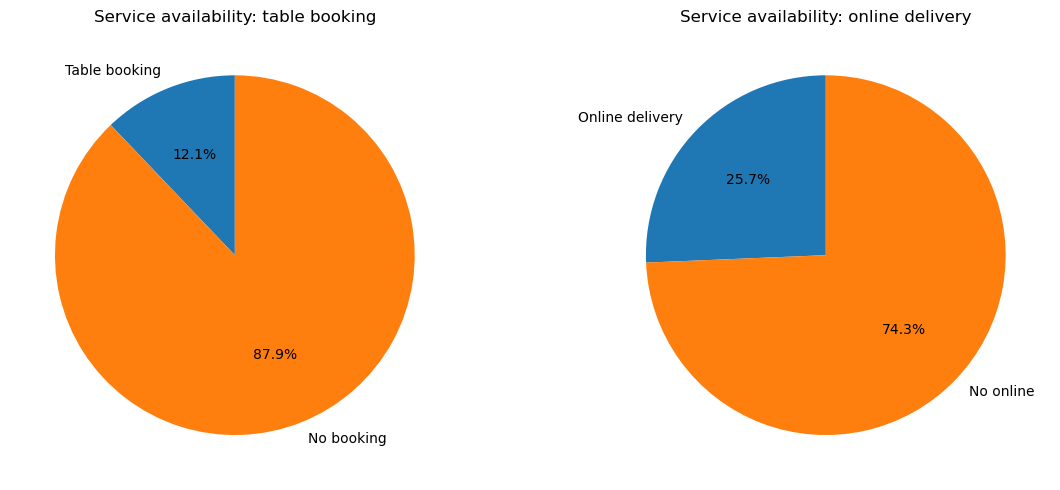

In [14]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
ax[0].pie([tb_pct.get('Yes',0),tb_pct.get('No',0)],labels=['Table booking','No booking'],autopct='%1.1f%%',startangle=90)
ax[0].set_title('Service availability: table booking')
ax[1].pie([od_pct.get('Yes',0),od_pct.get('No',0)],labels=['Online delivery','No online'],autopct='%1.1f%%',startangle=90)
ax[1].set_title('Service availability: online delivery')
plt.tight_layout(); plt.show()

In [17]:
avg_by_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10).round(2)
print('top 10 cities by avg rating:\n', avg_by_city)

best_price = None; best_pct = None
if 'Yes' in od_price.columns:
    best_price = int(od_price['Yes'].idxmax()); best_pct = float(od_price.loc[best_price,'Yes'])

svc_better = (
    'Table Booking' if (('Yes' in tb_stats.index) and ('No' in tb_stats.index) and (tb_stats.loc['Yes','mean'] > tb_stats.loc['No','mean']))
    else ('No Table Booking' if (('Yes' in tb_stats.index) and ('No' in tb_stats.index)) else 'n/a')
)

lines = []
lines.append(f"Table booking yes: {tb_pct.get('Yes',0):.1f}% | Online yes: {od_pct.get('Yes',0):.1f}%")
if best_price is not None:
    lines.append(f"Highest online delivery availability at price range {best_price} (~{best_pct:.1f}%)")
if isinstance(svc_better, str) and svc_better!='n/a':
    lines.append(f"Higher avg rating group: {svc_better}")

print('insights'); [print(x) for x in lines]

top 10 cities by avg rating:
 City
Inner City          4.90
Quezon City         4.80
Makati City         4.65
Pasig City          4.63
Mandaluyong City    4.62
Beechworth          4.60
London              4.54
Taguig City         4.53
Tagaytay City       4.50
Secunderabad        4.50
Name: Aggregate rating, dtype: float64
insights
Table booking yes: 12.1% | Online yes: 25.7%
Highest online delivery availability at price range 2 (~41.3%)
Higher avg rating group: Table Booking


[None, None, None]